In [1]:
## In this code I will write out the tracker particles, these will be used to see what happens to stars during the
## merger event. These will be written out using the get_gravity_at_position() function on the galaxy/IGM Fi solver
## This way the "ghost" particles won't have an effect on eachother or on the merger themself and computation is
## speed up considerably making it possible to use very large particle sets for statistical analysis
#
#
## First we generate 2 small "galaxies" so we can get the get_grav function to work and we have an example with
## which we can test the ghost particles.
## Once our small galaxy merge works we will attempt to add the ghost particles as seen in chapter 7 of the AMUSE
## book.
## And once we have this working we will start working on some statistical analysis functions for data analysis

In [1]:
import numpy
import random,math
from amuse.plot import plot,scatter
from matplotlib import pyplot
from amuse.units import nbody_system,units
from amuse.lab import Particles
from amuse.community.fi.interface import Fi
from amuse.community.ph4.interface import ph4

In [2]:
N= 40   #These values and code are just for my test galaxy, will be replaced by the Fi solver
r = 8
v=230 

def MW_and_M31():
    MW_M31 = Particles(2+2*N)
    MW = MW_M31[0]
    MW.mass = 1*10**11 | units.MSun
    MW.position = (0,0,0) | units.kpc
    MW.velocity = (10,10,0) | units.kms
    #MW.u = 0.5*(math.sqrt(2)*10)**2*1000*1000 | units.m**2 * units.s**-2
    for i in range(N):
        MW_M31[1+i].mass = 10 | units.MSun
        angle = random.random()*2*math.pi
        MW_M31[1+i].position = (r*math.cos(angle),r*math.sin(angle),0) | units.kpc
        MW_M31[1+i].velocity = (10+v*math.sin(angle),10 - math.cos(angle)*v,0) | units.kms
        #Tried to add energy thing since Fi wanted it but didn't work
        #MW_M31[1+i].u = 0.5*(math.sqrt((10 + v*math.sin(angle))**2+10 - math.cos(angle)*v))**2*1000*1000 | units.m**2 * units.s**-2
    M31 = MW_M31[N+1]
    M31.mass = 1.6*10**11 | units.MSun
    M31.position = (780,0,0) | units.kpc
    M31.velocity = (0,0,0) | units.kms
    for i in range(N):
        MW_M31[N+2+i].mass = 10 | units.MSun
        angle = random.random()*2*math.pi
        MW_M31[N+2+i].position = (780 + r*math.cos(angle),r*math.sin(angle),0) | units.kpc
        MW_M31[N+2+i].velocity = (v*math.sin(angle),-math.cos(angle)*v,0) | units.kms
        #MW_M31[N+2+i].u = 0.5*230**2*1000*1000 | units.m**2 * units.s**-2
    return MW_M31


Galaxies=MW_and_M31()


In [3]:
#Here we define the track particles with some values which can change their location and radius of distribution


Solarposition = (-6,6,0) | units.kpc  #If we displace MW, we can do it through this vector aswell
neighbourradius = 0.100 | units.kpc   #neighbourhood in which we distribute our stars
Ntracker=10                        #How many particles we will add
VelocityMilky = (10,10,0) | (units.km/units.s)  #Velocity at which the milkyway is traveling
vel = 220 | (units.km/units.s)   #This is roughly the velocity for our solarsystem around MW
#If we want to use different position we have to make sure to properly change the velocity.
#I also assumed the velocity is roughly constant throughout the neighbourradius which only for small r is the case
def Nstars():  
    particles = Particles(Ntracker)
    i=0
    while i < Ntracker:
        #here we generate our N bodies, we can change code in here to reflect different things
        #We can distribut them randomly, have them near eachother, all at the same radius etc.
        #All particles are in the x-y plane, this should still be adjusted accordingly to give some z randomization
        
        #For now I will keep the mass the same and distribute uniformly over a circle
        smallangle = random.random()*2*math.pi   #smallangle  is angle around solarpos, angle is angle around Sag A
        radius = neighbourradius * math.sqrt(random.random()) #sqrt so it's uniform and not clumped at r=0
        particles[i].mass = 5 | units.MSun 
        particles[i].radius = 1.5 | units.RSun   
        #I have no z displacement, I can still add this though
        particles[i].position = (radius*math.cos(smallangle) + Solarposition[0], radius*math.sin(smallangle) + Solarposition[1],Solarposition[2]) 
        #arctan only -pi/2 to pi/2, this codes gives us from -pi/2 to 3pi/2, we need global angle to fix vel vector
        if particles[i].x < 0 | units.kpc:
            angle = math.atan(particles[i].y / particles[i].x) + math.pi
        else:
            angle = math.atan(particles[i].y/particles[i].x)
        
        #print(360*angle/(2*math.pi)) you can check that the angles are correct this way
        
        particles[i].velocity = [math.sin(angle)*vel + VelocityMilky[0],-math.cos(angle)*vel+VelocityMilky[1],VelocityMilky[2]] 
        i += 1
    return particles
Tracker = Nstars()
print(Tracker)

                 key         mass       radius           vx           vy           vz            x            y            z
                   -         MSun         RSun  1000.0 * m * s**-1  1000.0 * m * s**-1       km / s  3.08567758128e+19 * m  3.08567758128e+19 * m          kpc
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 6625104368072909488    5.000e+00    1.500e+00    1.669e+02    1.642e+02    0.000e+00   -5.996e+00    6.100e+00    0.000e+00
 3887830286697682193    5.000e+00    1.500e+00    1.654e+02    1.657e+02    0.000e+00   -6.038e+00    6.027e+00    0.000e+00
  670663481207609027    5.000e+00    1.500e+00    1.655e+02    1.657e+02    0.000e+00   -6.027e+00    6.019e+00    0.000e+00
16354814306732322228    5.000e+00    1.500e+00    1.648e+02    1.664e+02    0.000e+00   -6.035e+00    5.973e+00    0.000e+00
18331212424917636906    5.000e+00    1.500e+00    1.657e+02    1.654e+02    0.000e+00   -6.

In [4]:
#This ph4 will be replaced by the Fi later
converter=nbody_system.nbody_to_si(1.0e12|units.MSun, 100|units.kpc)
gravity = ph4(converter)
gravity.particles.add_particles(Galaxies)
channel1 = gravity.particles.new_channel_to(Galaxies)
channel2 = Tracker.new_channel_to(Tracker)
DeltaT = 1   #This is the timestep we will use in Myr
#If we want to have a non constant DeltaT we would need to change some of the code since leap-frog is not stable
#enough for varying timesteps. Can be done by finishing the leap-frog and starting a new one

gravity.timestep = DeltaT|units.Myr
times = numpy.arange(0., 50, DeltaT) | units.Myr


unity = 1 | units.m**-1 * units.s**2 #We do this to remove the units inside the vector
unity2 = 1 | units.m * units.s**-2  #Here we add the units on the outside
Accelout = [0,0,0] 
#Now that we have initialised our particle set we have the main gravitational solver with a certain timestep DeltaT
#This is what will later be the main solving part of Fi.
k=0
for time in times:
    #print(time)  
    #This is just the gravity solving, this will be replaced by the Fi solver in the main code
    gravity.evolve_model(time)
    channel1.copy()
    
    #print(Galaxies.position[3]) #I added this to quickly see if it works, I'll add some actual plots later
    #here we define a leapfrog integration method for the tracker particles through the get_gravity_at_point()
    if k ==0:       #First timestep is only half for leapfrog
        for i in range(Ntracker):  #We have to repeat this for all particles in our set of trackers
            Accelout = [0,0,0] 
            #We get the acceleration at x_i
            accel = gravity.get_gravity_at_point(3 | units.km, Tracker[i].position[0],Tracker[i].position[1],Tracker[i].position[2])
            for f in range(3):
                
                Accelout[f] = (accel[f]*unity)  #removing units
                
            Accelout = Accelout*unity2 #units outside vector
            
            #We calculate v_{i+1/2} over the x y and z (I tried adding directly but got mismatched units)
            #and we calculate x_{i+1} with the velocity v_{i+1/2}
            
            
                
            Tracker[i].velocity = Tracker[i].velocity + Accelout*gravity.timestep*0.5
                
            Tracker[i].position = Tracker[i].position + Tracker[i].velocity*gravity.timestep
              
            
            
    else:    #rest of the leapfrog, I might still have to change something for the last step of the frog
        
        for i in range(Ntracker):
            #We get the acceleration at x_i
            Accelout = [0,0,0]
            accel = gravity.get_gravity_at_point(3 | units.km, Tracker[i].position[0],Tracker[i].position[1],Tracker[i].position[2])
            for f in range(3):
                
                Accelout[f] = (accel[f]*unity)
                
            Accelout = Accelout*unity2
            #We calculate v_{i+1/2} over the x y and z (I tried adding directly but got mismatched units)
            #and we calculate x_{i+1} with the velocity v_{i+1/2}
            Tracker[i].velocity = Tracker[i].velocity + Accelout*gravity.timestep
              
            Tracker[i].position = Tracker[i].position + Tracker[i].velocity*gravity.timestep
            
        
    k += 1
    
    
    
    
    
gravity.stop()

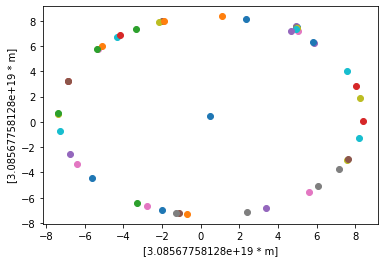

In [5]:
for i in range(Ntracker):
    scatter(Tracker[i].position[0],Tracker[i].position[1])
for i in range(N+1):
    scatter(Galaxies[i].x,Galaxies[i].y)
#Quick plot to see end result, need to make some actual data analysis functions and such which will come later

#The other cell's are mostly just me randomly testing stuff to make sure things work, they can be ignored

In [6]:
print(Tracker.position)

[[4.97727931998, 7.51365188921, 0.0], [4.92856575101, 7.49772759318, 0.0], [4.94145150117, 7.46076709429, 0.0], [4.93211726789, 7.40941917553, 0.0], [4.91109932913, 7.58515833755, 0.0], [4.92292938063, 7.4384608224, 0.0], [5.02075733732, 7.20741796548, 0.0], [4.91211944702, 7.49871956125, 0.0], [5.00327738017, 7.40933683606, 0.0], [4.9519025391, 7.37598334077, 0.0]] 3.08567758128e+19 * m


In [ ]:
####
#### Most of what comes next can be ignored
#### the histogram plotting has already been added in solar_distance_histogram.py
####

In [7]:
i= 3
print(Tracker[i].position)
Galaxies[:N].center_of_mass()
Galaxies[:N].center_of_mass() - Tracker[i].position
b = Galaxies[:N].center_of_mass() - Tracker[i].position
unity = 1 | units.kpc**-2
r = math.sqrt(b[0]*b[0]*unity)
print(r)

[4.93211726789, 7.40941917553, 0.0] 3.08567758128e+19 * m
4.426892464036381


[8.314893930123361, 8.275332857464106, 8.251040126818852, 8.202750549856965, 8.340115940180151, 8.222274541428352, 8.082616321646851, 8.267392918944227, 8.241303262784495, 8.18535334950842]


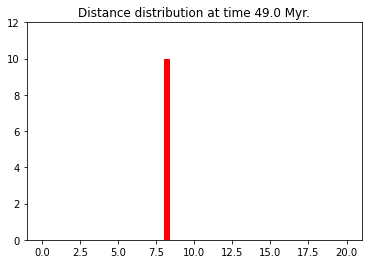

In [8]:
#We write a function that can be called to plot a histogram of distances
#We still have a lot of work ahead of us, we need to change some parameters to make the histogram look better
#Mostly the bins, but in our current test dataset it won't look that well

import matplotlib.pyplot as plt
z = time   #This was to test if str converts the unit aswell

def Histogram(CenterofMass,Trackerpos,Time,Scriptpath,Filename):
    unity = 1 | units.kpc**-2
    r = []
    
    for i in range(len(Trackerpos)):
        b = CenterofMass - Trackerpos[i]
        r.append(math.sqrt((b[0]**2 + b[1]**2 + b[2]**2)*unity))
    fig = plt.hist(r, bins=50, facecolor='r',range=(0,20)) 
    
    plt.title('Distance distribution at time ' +str(Time) + '.')
    
    plt.ylim(0,Ntracker*1.2) #Ntracker is the max value, we can change this to make the plot look better
    print(r)
    plt.show()
    
    
    
    
Histogram(Galaxies[:N].center_of_mass(),Tracker.position,z,3,5)

In [15]:
### Why logic have thou forsaken me
z = [0,0,0]
print(Tracker[i].velocity)
print(accel*gravity.timestep*0.5)
print(Tracker[i].velocity[1] + accel[1]*gravity.timestep*0.5)
z[1]  = Tracker[i].velocity[1] + accel[1]*gravity.timestep*0.5
print(z)
Tracker[i].velocity[1] = Tracker[i].velocity[1] +  accel[1]*gravity.timestep*0.5
print(Tracker[i].velocity[1])


[156.063206594, 174.516077268, 0.0] 1000.0 * m * s**-1
[-2.2746471001e-10 m * s**-2, -2.65670481544e-10 m * s**-2, 0.0 m * s**-2] 31556925993600.004 * s
166.132333543 1000.0 * m * s**-1
[0, quantity<166.132333543 1000.0 * m * s**-1>, 0]
174.516077268 1000.0 * m * s**-1


In [37]:
k = [0,0,0] 
for j in range(3):
    k[j] = accel[j] | units.s**2 * units.m**-1
print(k)
eenheid = 1 | units.m**-1 * units.s**2
print(Tracker[i].velocity)

[quantity<-9.09858840042e-10 m * s**-2 s**2 * m**-1>, quantity<-1.06268192618e-09 m * s**-2 s**2 * m**-1>, quantity<0.0 m * s**-2 s**2 * m**-1>]
[186.063206594, 224.516077268, 90.0] 1000.0 * m * s**-1


In [38]:
for j in range(3):
    k[j] = accel[j]*eenheid


[-9.0985884004194333e-10, -1.0626819261765853e-09, 0.0]


In [60]:
Accelout = [0,0,0] 
unity = 1 | units.m**-1 * units.s**2 
for f in range(3):
    Accelout[f] = accel[f]*unity

Accelout = Accelout*unity2

In [61]:
print(Accelout)

[2.89927366164e-10, -1.94240072909e-10, 0.0] m * s**-2
